# **MÔ HÌNH DỰ ĐOÁN PHIM**

Vấn đề:

Mô hình 1: RandomForestRegressor

Mô hình 2: LinearRegression

Import thư viện cần thiết

In [126]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('../Data/movie_data.csv')
df.head()

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action,Adventure,Animation,...,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12430.6658,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.0000,False,True,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.0000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.0000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.0000,False,False,False,...,True,False,False,False,False,False,False,0.0,0.0,1


In [128]:
data = df.copy()

In [129]:
# data['Runtime'] = data['Runtime'].round()
# data['IMDb Votes'] = data['IMDb Votes'].round()

In [130]:
def resolve_outliers(col: pd.Series):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    return lower, upper

lower_limit, upper_limit = resolve_outliers(df['IMDb Rating'])
data = data[(data['IMDb Rating'] >= lower_limit) & (data['IMDb Rating'] <= upper_limit)]

/home/uyennguyen/miniconda3/envs/min_ds-env2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


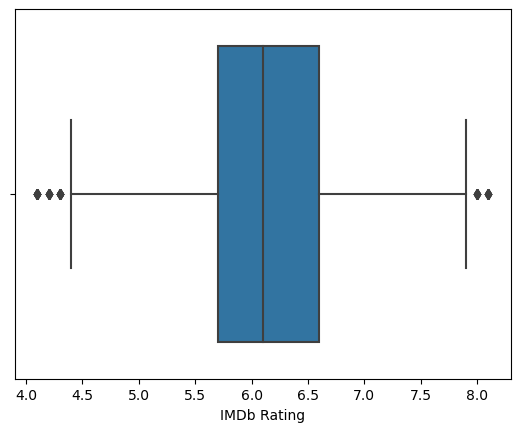

In [131]:
sns.boxplot(data['IMDb Rating']);

In [132]:
data = data.iloc[:, 3:]
data = data.drop(columns=['Language'])
data = data[[col for col in data.columns if col != 'IMDb Rating'] + ['IMDb Rating']]
data.columns

Index(['Runtime', 'IMDb Votes', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
       'Win', 'Nomination', 'Age rating quantification', 'IMDb Rating'],
      dtype='object')

In [133]:
y = data['IMDb Rating']
X = data.iloc[:, :-1]

/home/uyennguyen/miniconda3/envs/min_ds-env2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


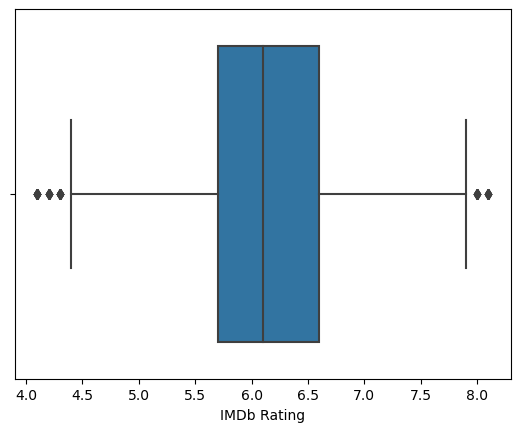

In [134]:
sns.boxplot(y);

In [135]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)

In [143]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_prediction_lr = lr_model.predict(X_valid)

In [137]:
X.dtypes

Runtime                      float64
IMDb Votes                   float64
Action                          bool
Adventure                       bool
Animation                       bool
Biography                       bool
Comedy                          bool
Crime                           bool
Documentary                     bool
Drama                           bool
Family                          bool
Fantasy                         bool
History                         bool
Horror                          bool
Music                           bool
Musical                         bool
Mystery                         bool
Romance                         bool
Sci-Fi                          bool
Short                           bool
Sport                           bool
Thriller                        bool
War                             bool
Western                         bool
Win                          float64
Nomination                   float64
Age rating quantification      int64
d

In [138]:
# Khởi tạo và huấn luyện mô hình Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Lấy feature importance
importances = rf.feature_importances_

# Tạo DataFrame để hiển thị feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
1,IMDb Votes,0.316718
0,Runtime,0.210823
25,Nomination,0.097110
26,Age rating quantification,0.051155
8,Documentary,0.046584
21,Thriller,0.042695
24,Win,0.028628
13,Horror,0.027305
6,Comedy,0.021628
2,Action,0.020154


In [139]:
rf_model = RandomForestRegressor(random_state=42)

hyperparameters = {  
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [None, 10, 20, 30],   
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'], 
}  

grid_search = GridSearchCV(rf_model, hyperparameters, cv=5, scoring='neg_mean_squared_error', n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)

#y_pred_valid = grid_search.predict(X_train)
best_rf_model = grid_search.best_estimator_
y_prediction_rf = best_rf_model.predict(X_valid)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_featu

In [140]:
best_rf_model

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=50,
                      random_state=42)

In [144]:
# Evaluate both models on validation set
mse_lr = mean_squared_error(y_valid, y_prediction_lr)
mse_rf = mean_squared_error(y_valid, y_prediction_rf)

print(f"MSE for linear regression method: {mse_lr:.2f}")
print(f"MSE for random forest method: {mse_rf:2f}")

MSE for linear regression method: 0.56
MSE for random forest method: 0.456847


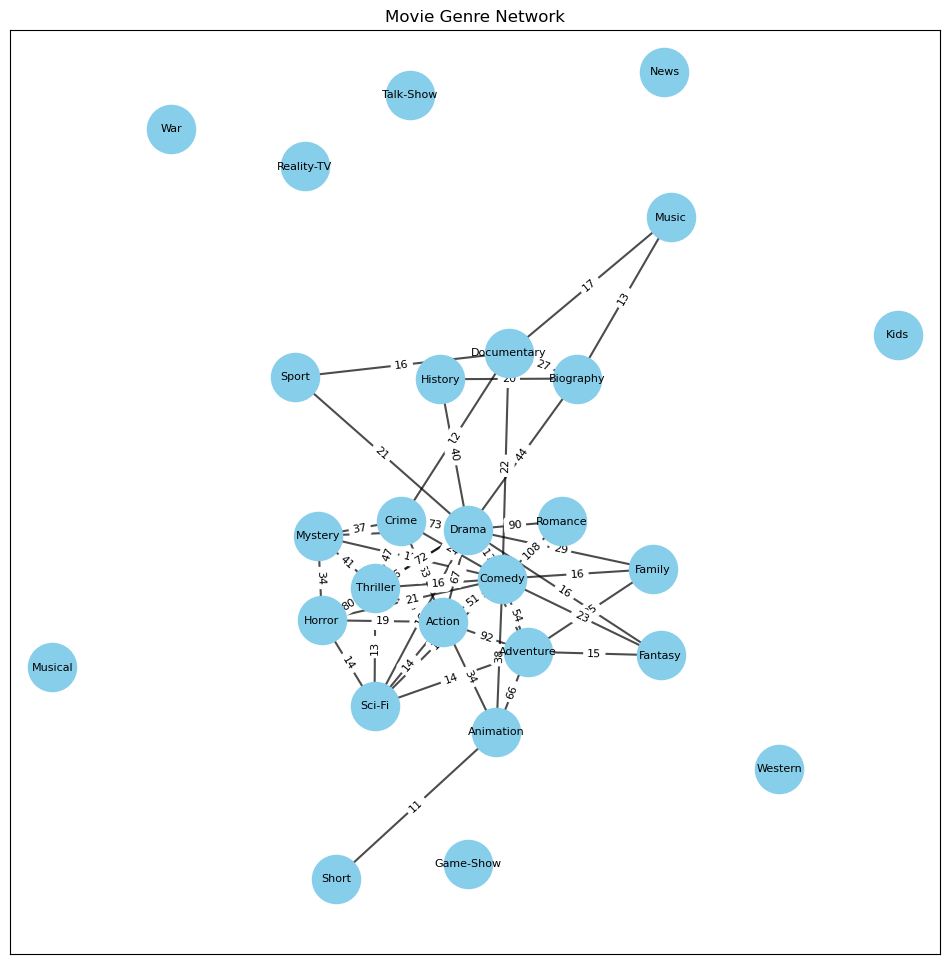

In [ ]:
# import networkx as nx
# # 1. Tính ma trận đồng xuất hiện giữa các thể loại
# data[genre_columns] = data[genre_columns].astype(int)
# genre_matrix = data[genre_columns].T.dot(data[genre_columns])

# # 2. Xây dựng đồ thị
# G = nx.Graph()

# # Thêm các node (thể loại)
# for genre in genre_columns:
#     G.add_node(genre)

# # Thêm các edge (liên kết) với trọng số
# threshold = 10  # Ngưỡng đồng xuất hiện để vẽ liên kết (tùy chỉnh)
# for i in range(len(genre_columns)):
#     for j in range(i + 1, len(genre_columns)):
#         weight = genre_matrix.iloc[i, j]
#         if weight > threshold:  # Chỉ thêm liên kết nếu tần suất lớn hơn ngưỡng
#             G.add_edge(genre_columns[i], genre_columns[j], weight=weight)

# # 3. Vẽ đồ thị
# plt.figure(figsize=(12, 12))
# pos = nx.spring_layout(G, k=2)  # Tính toán vị trí các node (bố cục đồ thị)
# edges = G.edges(data=True)

# # Vẽ các node
# nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='skyblue')
# nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# # Vẽ các edge (liên kết)
# nx.draw_networkx_edges(G, pos, edgelist=edges, width=1.5, alpha=0.7)
# nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges}, font_size=8)

# plt.title("Movie Genre Network")
# plt.show()

In [142]:
# import community as community_louvain

# # Phát hiện cụm bằng thuật toán Louvain
# partition = community_louvain.best_partition(G)

# # Vẽ đồ thị với màu sắc cho từng cụm
# plt.figure(figsize=(12, 12))
# pos = nx.spring_layout(G, k=0.5)
# cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)

# nx.draw_networkx_nodes(G, pos, node_size=700, cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
# nx.draw_networkx_edges(G, pos, alpha=0.5)

# plt.title("Movie Genre Network with Clusters")
# plt.show()

In [145]:
data.columns

Index(['Runtime', 'IMDb Votes', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
       'Win', 'Nomination', 'Age rating quantification', 'IMDb Rating'],
      dtype='object')

In [147]:
genre_columns = ['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

In [158]:
df = data[genre_columns]

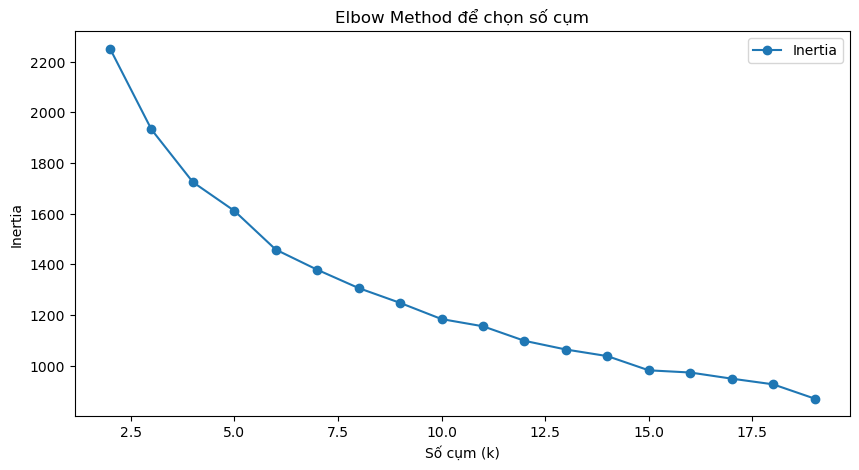

In [159]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Sử dụng K-Means để phân cụm
k_values = range(2, len(genre_columns) - 2) 
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# 3. Đánh giá số cụm phù hợp bằng Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để chọn số cụm')
plt.legend()
plt.show()


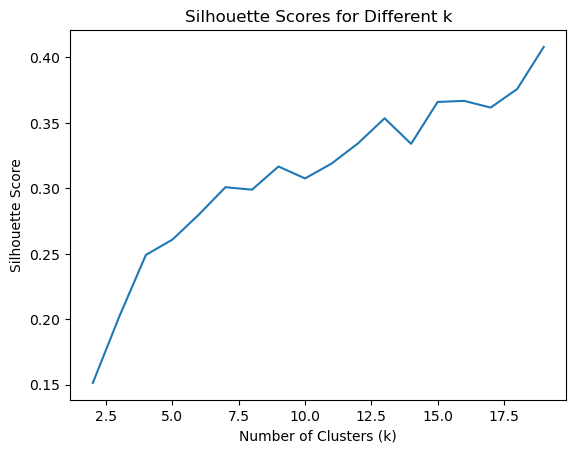

In [ ]:
# Vẽ đồ thị silhouette score
plt.plot(range(2, len(genre_columns) - 2), silhouette_scores)
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

/tmp/ipykernel_79132/4012201620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters



Dữ liệu sau khi phân cụm:


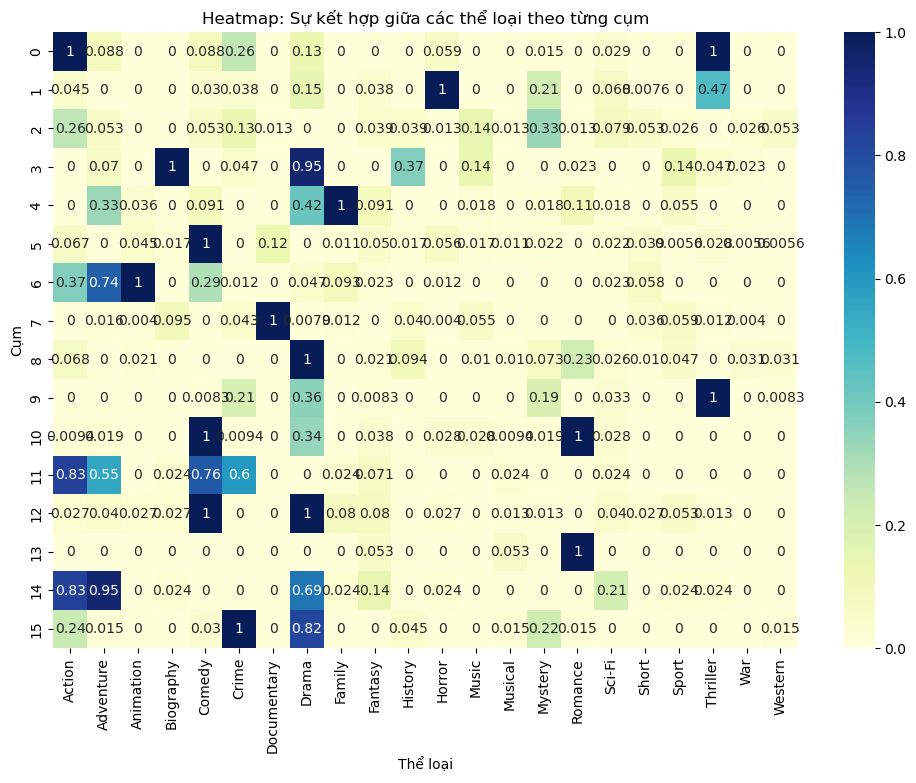

Cụm 0: Các thể loại phổ biến
  - Action, Thriller
Cụm 1: Các thể loại phổ biến
  - Horror
Cụm 2: Các thể loại phổ biến
  - 
Cụm 3: Các thể loại phổ biến
  - Biography, Drama
Cụm 4: Các thể loại phổ biến
  - Family
Cụm 5: Các thể loại phổ biến
  - Comedy
Cụm 6: Các thể loại phổ biến
  - Adventure, Animation
Cụm 7: Các thể loại phổ biến
  - Documentary
Cụm 8: Các thể loại phổ biến
  - Drama
Cụm 9: Các thể loại phổ biến
  - Thriller
Cụm 10: Các thể loại phổ biến
  - Comedy, Romance
Cụm 11: Các thể loại phổ biến
  - Action, Adventure, Comedy, Crime
Cụm 12: Các thể loại phổ biến
  - Comedy, Drama
Cụm 13: Các thể loại phổ biến
  - Romance
Cụm 14: Các thể loại phổ biến
  - Action, Adventure, Drama
Cụm 15: Các thể loại phổ biến
  - Crime, Drama


In [157]:
# 4. Chọn số cụm phù hợp (giả sử k=3)
k_optimal = 16
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df)

# Thêm nhãn cụm vào dữ liệu
df['Cluster'] = clusters

print("\nDữ liệu sau khi phân cụm:")
df

# 5. Trực quan hóa sự tương quan giữa các thể loại trong cùng một cụm
df_grouped = df.groupby('Cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(df_grouped, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Heatmap: Sự kết hợp giữa các thể loại theo từng cụm')
plt.xlabel('Thể loại')
plt.ylabel('Cụm')
plt.show()

# 6. Phân tích kết quả
for cluster_id in df_grouped.index:
    print(f"Cụm {cluster_id}: Các thể loại phổ biến")
    popular_genres = df_grouped.loc[cluster_id][df_grouped.loc[cluster_id] > 0.5].index.tolist()
    print(f"  - {', '.join(popular_genres)}")

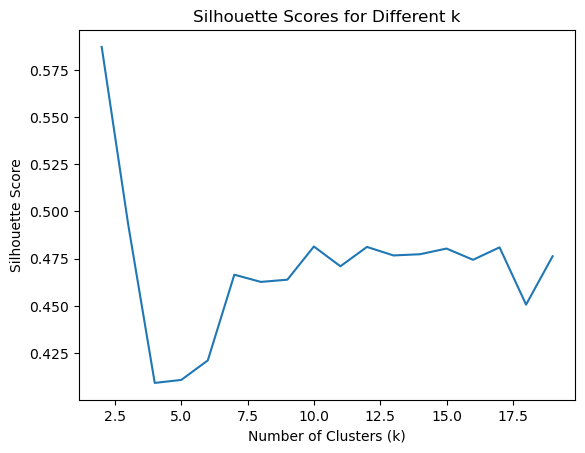

In [155]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, len(genre_columns) - 2):  # Bạn có thể thử từ k=2 đến k=10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)  # Giả sử X là dữ liệu của bạn
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

# Vẽ đồ thị silhouette score
plt.plot(range(2, len(genre_columns) - 2), silhouette_scores)
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()